# Example 1: Fitting Amplitude Rabi ocilations 
###### Author: Malthe Asmus Marciniak Nielsen

This example shows how to plot and fit Rabi ocilations using a DampedOscillationModel.

## Step 1: Import packages 
We import both the Plotter, Fitter, fitmodels, load_labber_file and os. load_labber_file is required to exstrate the data from Labber files.

In [1]:
from dataanalyzer import Plotter, Fitter, fitmodels, load_labber_file
import os

# Step 2: Load the data
We load the data using os and load_labber_file. If inspect = True in load_labber_file, the parameter names will be automatically printed.

In [2]:
z_drive = r"Z:\Malthe\DataAnalyzer\sample_data" if os.name == "nt" else "/Volumes/users/Malthe/DataAnalyzer/sample_data"
path = os.path.join(z_drive, "Data_Rabi_Amplitude.hdf5")
path = "/Users/malthenielsen/Documents/01 KU/05 QDev/Sample data for plotter/q3_rabi_amp.hdf5"

[amp], [pulse, _] = load_labber_file(path, insepct=True)

pulse = pulse.real # pick only the real part of the data

Insepcting Labber File...
File is containing 1 parameters:
	Pulse Generator - Amplitude #1
File is containing 2 results:
	Pulse Generator - Voltage, QB1
	Alazar Digitizer - Ch1 - Data


# Step 3: Initalize Fiiter
We initialize the Fitter and defines the function for fitting. Then we do the fit.

In [3]:
# Setting up function
func = fitmodels.DampedOscillationModel()

# Initialize fitter
fit = Fitter(x=amp, y=pulse, model=func)

In [ ]:
# Step 4: Initalize Plotter
We plot the data and the fitted model along with a vertical line at the center value.

In [5]:
from dataanalyzer import Plotter, Fitter, fitmodels, load_labber_file

# Load Labber file
[amp], [pulse, _] = load_labber_file("../some_path/q3_rabi_amp.hdf5", inspect=True)

inspecting Labber File...
File is containing 1 parameters:
	Pulse Generator - Amplitude #1
File is containing 2 results:
	Pulse Generator - Voltage, QB1
	Alazar Digitizer - Ch1 - Data


In [6]:
# Defining fitting model
func = fitmodels.DampedOscillationModel()
fit = Fitter(x=amp, y=pulse.real, model=func)

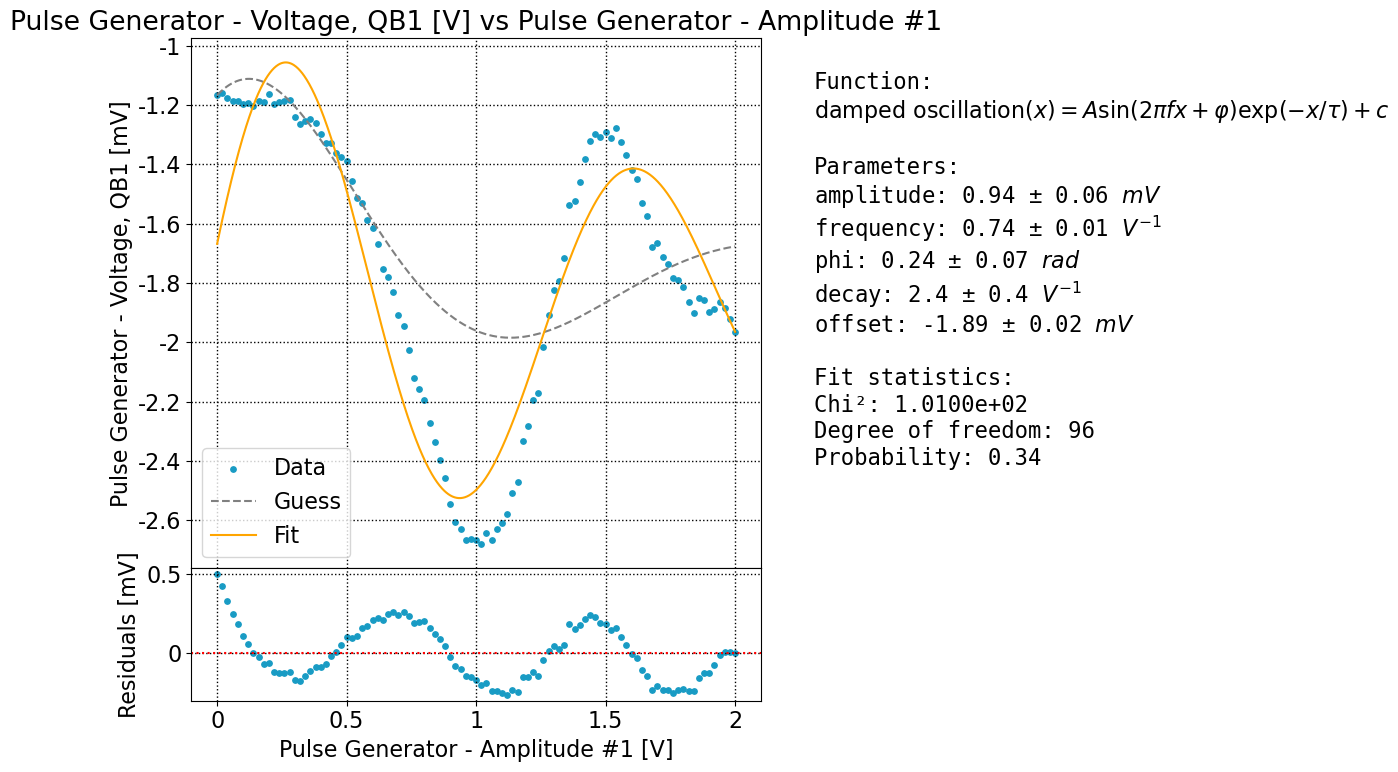

In [8]:
# Plot the fitted data
plot = Plotter()
plot.plot_fit(fit, plot_residuals=True)
plot.show()

/Users/malthenielsen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


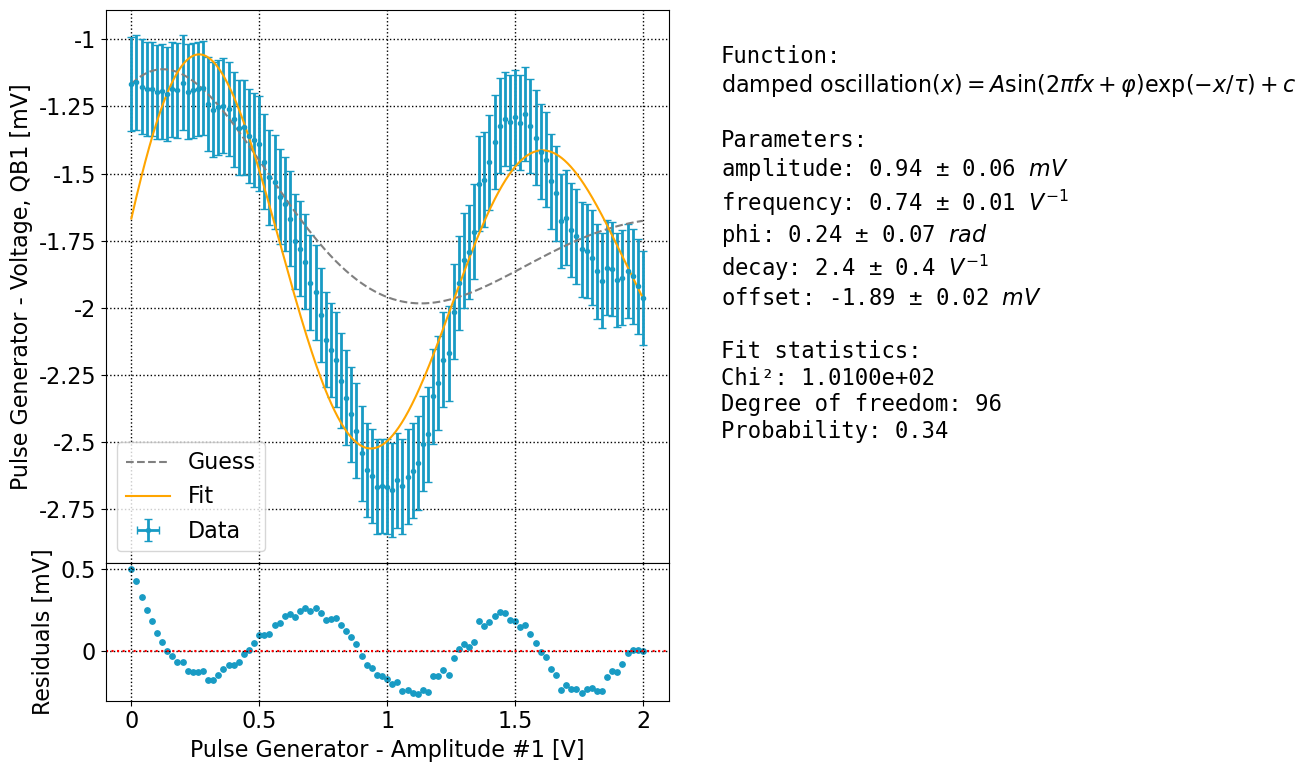

In [7]:
# Initialize plotter
plot = Plotter()

# Add data
plot.errorbar(x=amp, y=pulse, yerr=fit.yerr_scaled, label="Data")
plot.plot_fit(fit, plot_residuals=True, flip_axis=False, plot_data=False)
plot.ax.set_title("")

# Show plot
plot.show()